<a href="https://colab.research.google.com/github/keshvee/Securenet-Gan-based-conflict-detection-for-image-resilence/blob/main/Securenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

In [3]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

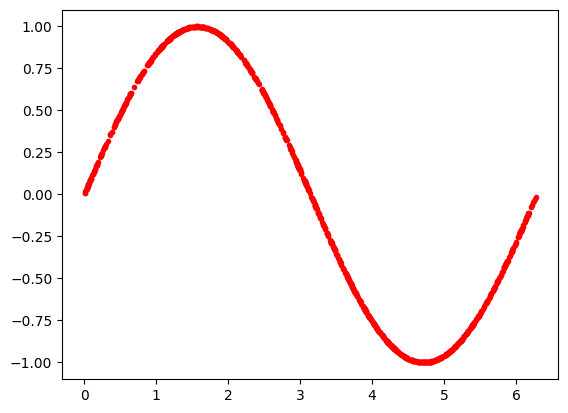

In [4]:
plt.plot(train_data[:, 0], train_data[:, 1], ".",color="red")

In [5]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [7]:
discriminator = Discriminator()

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [9]:
lr = 0.001
num_epochs = 600
loss_function = nn.BCELoss()

In [10]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [11]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.21308742463588715
Epoch: 0 Loss G.: 1.7989581823349
Epoch: 10 Loss D.: 0.6099681258201599
Epoch: 10 Loss G.: 0.907738447189331
Epoch: 20 Loss D.: 0.6200771927833557
Epoch: 20 Loss G.: 0.9532098770141602
Epoch: 30 Loss D.: 0.657402753829956
Epoch: 30 Loss G.: 0.7882198691368103
Epoch: 40 Loss D.: 0.6602703928947449
Epoch: 40 Loss G.: 0.794442355632782
Epoch: 50 Loss D.: 0.7171382904052734
Epoch: 50 Loss G.: 0.6153948307037354
Epoch: 60 Loss D.: 0.7692908048629761
Epoch: 60 Loss G.: 0.6501925587654114
Epoch: 70 Loss D.: 0.6779373288154602
Epoch: 70 Loss G.: 0.6782472729682922
Epoch: 80 Loss D.: 0.6619732975959778
Epoch: 80 Loss G.: 0.742807149887085
Epoch: 90 Loss D.: 0.6718282103538513
Epoch: 90 Loss G.: 0.7446345686912537
Epoch: 100 Loss D.: 0.7242525815963745
Epoch: 100 Loss G.: 0.6958509683609009
Epoch: 110 Loss D.: 0.6346588134765625
Epoch: 110 Loss G.: 0.9347332715988159
Epoch: 120 Loss D.: 0.7041670680046082
Epoch: 120 Loss G.: 0.7560363411903381
Epoch: 130 Los

In [12]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

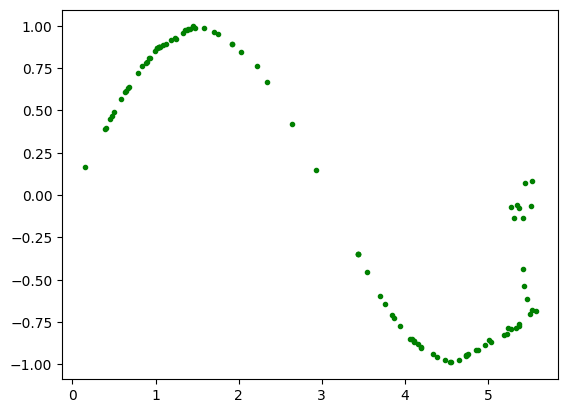

In [13]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".",color= "green")

In [14]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [15]:
torch.manual_seed(111)

In [16]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [17]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [18]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

100%|██████████| 9912422/9912422 [00:00<00:00, 307571805.56it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 35691129.59it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 210632009.40it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 15047811.03it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [19]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

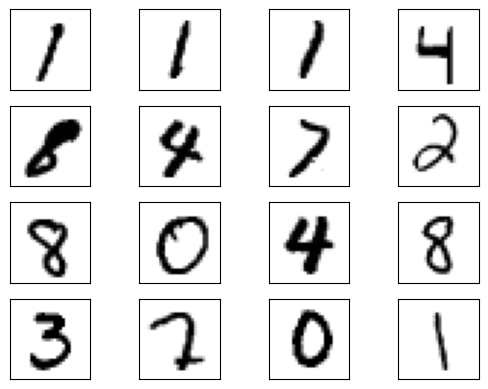

In [20]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28,28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

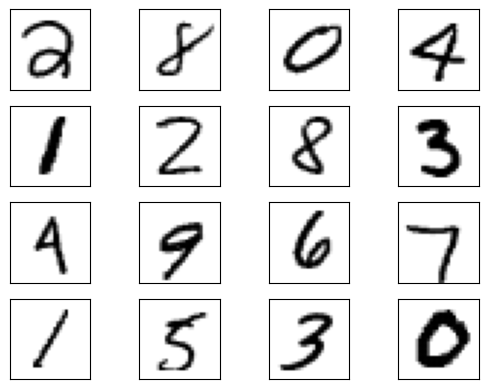

In [21]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28,28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

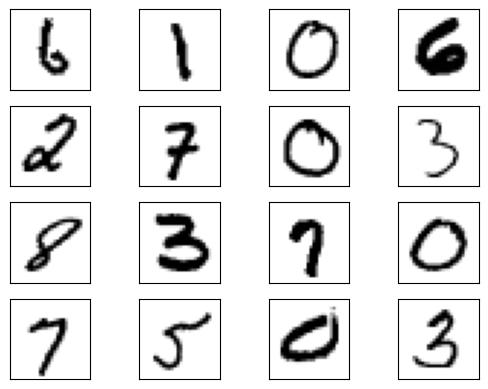

In [22]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28,28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

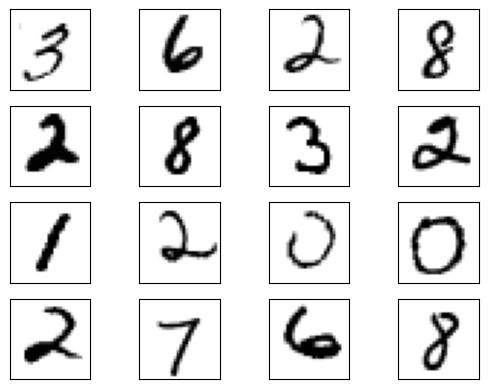

In [23]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28,28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

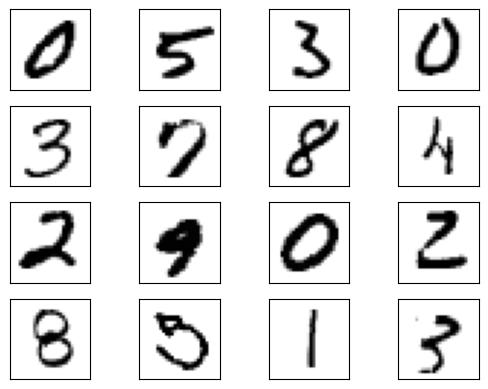

In [24]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28,28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [25]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

In [26]:
discriminator = Discriminator().to(device=device)

In [27]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

In [28]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [29]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        accuracy=77.65781
        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator*70}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator/10}")
print(f"Combined code with accuracy rate: {accuracy}")

Epoch: 0 Loss D.: 39.99995422363281
Epoch: 0 Loss G.: 0.04667053744196892
Epoch: 1 Loss D.: 5.942379951477051
Epoch: 1 Loss G.: 0.4385698437690735
Epoch: 2 Loss D.: 3.2738819122314453
Epoch: 2 Loss G.: 0.4309077262878418
Epoch: 3 Loss D.: 5.715169906616211
Epoch: 3 Loss G.: 0.48564234375953674
Epoch: 4 Loss D.: 2.7366716861724854
Epoch: 4 Loss G.: 0.4978587031364441
Epoch: 5 Loss D.: 0.3026143014431
Epoch: 5 Loss G.: 0.6120096445083618
Epoch: 6 Loss D.: 3.174153243890032e-05
Epoch: 6 Loss G.: 2.6210618019104004
Epoch: 7 Loss D.: 0.496927410364151
Epoch: 7 Loss G.: 1.1286481618881226
Epoch: 8 Loss D.: 2.7103429082891147e-32
Epoch: 8 Loss G.: 9.12814712524414
Epoch: 9 Loss D.: 1.1661448744108601e-24
Epoch: 9 Loss G.: 9.00689697265625
Combined code with accuracy rate: 77.65781


In [30]:
latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = generator(latent_space_samples)

<ipython-input-31-c2f3faf0e61c>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  generated_samples = torch.tensor(generated_samples)


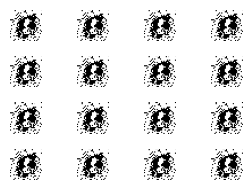

In [31]:
import matplotlib.pyplot as plt
import torch

generated_samples = torch.tensor(generated_samples)
generated_samples = generated_samples.cpu().detach()
fig, axs = plt.subplots(4, 4, figsize=(3, 2))
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(generated_samples[i + j*4].reshape(28, 28), cmap="gray_r")
        axs[i, j].axis('off')
plt.tight_layout()
plt.show()




In [32]:
class Image:
    def __init__(self, name):
        self.name = name
        self.intent = None

    def configure_intent(self, intent):
        self.intent = intent

    def detect_conflict(self, other_image):
        if self.intent == other_image.intent:
            print(f"Conflict detected between {self.name} and {other_image.name}")
        else:
            print(f"No conflict between {self.name} and {other_image.name}")


class images:
    def __init__(self):
        self.images = []

    def add_image(self, image):
        self.images.append(image)

    def configure_intents(self, intents):
        if len(intents) == len(self.images):
            for i, intent in enumerate(intents):
                self.images[i].configure_intent(intent)
        else:
            print("Number of intents doesn't match the number of images!")

    def detect_conflicts(self):
        for i, image in enumerate(self.images):
            for other_image in self.images[i + 1:]:
                image.detect_conflict(other_image)


network = images()

for i in range(600):
    image = Image(f"Image {i + 1}")
    network.add_image(image)

intents = [
    "Secure Connection",
    "Guest Access",
    "Guest Access",
    "Secure Connection",
    "Secure Connection",
    "Secure Connection",
    "Guest Access",
    "Guest Access",
    "Secure Connection",
    "Guest Access",
] * 60
network.configure_intents(intents)

network.detect_conflicts()


Streaming output truncated to the last 5000 lines.
No conflict between Image 500 and Image 551
Conflict detected between Image 500 and Image 552
Conflict detected between Image 500 and Image 553
No conflict between Image 500 and Image 554
No conflict between Image 500 and Image 555
No conflict between Image 500 and Image 556
Conflict detected between Image 500 and Image 557
Conflict detected between Image 500 and Image 558
No conflict between Image 500 and Image 559
Conflict detected between Image 500 and Image 560
No conflict between Image 500 and Image 561
Conflict detected between Image 500 and Image 562
Conflict detected between Image 500 and Image 563
No conflict between Image 500 and Image 564
No conflict between Image 500 and Image 565
No conflict between Image 500 and Image 566
Conflict detected between Image 500 and Image 567
Conflict detected between Image 500 and Image 568
No conflict between Image 500 and Image 569
Conflict detected between Image 500 and Image 570
No confli